In [2]:
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import MaxPool2D
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, AvgPool2D
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1K0kZfy1zQTdoopRndelOKuxX9OYp4lX_

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Downloading...
From: https://drive.google.com/uc?id=1K0kZfy1zQTdoopRndelOKuxX9OYp4lX_
To: /content/CNN_dataset.zip
100% 100M/100M [00:00<00:00, 254MB/s] 


In [4]:
!unzip -o CNN_dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: CNN_dataset/CXR/009317.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._009317.jpeg  
  inflating: CNN_dataset/CXR/002808.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._002808.jpeg  
  inflating: CNN_dataset/CXR/000835.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._000835.jpeg  
  inflating: CNN_dataset/CXR/001727.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._001727.jpeg  
  inflating: CNN_dataset/CXR/004525.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._004525.jpeg  
  inflating: CNN_dataset/CXR/006518.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._006518.jpeg  
  inflating: CNN_dataset/CXR/008855.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._008855.jpeg  
  inflating: CNN_dataset/CXR/009747.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._009747.jpeg  
  inflating: CNN_dataset/CXR/001377.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._001377.jpeg  
  inflating: CNN_dataset/CXR/004175.jpeg  
  inflating: __MACOSX/CNN_dataset

In [5]:
import os

dataFolder = './CNN_dataset/'

classNames = sorted([x for x in os.listdir(dataFolder) if os.path.isdir(os.path.join(dataFolder, x))])
classCount = len(classNames)
imageFiles = [[os.path.join(dataFolder, className, x) 
                for x in os.listdir(os.path.join(dataFolder, className))] 
               for className in classNames]

imageLabelList = []
imageFileList = []

for i, className in enumerate(classNames):
    imageFileList.extend(imageFiles[i])
    imageLabelList.extend([i] * len(imageFiles[i]))
totalNum = len(imageFileList)


print("Labels:", classNames)
print("Label Counts:", [len(imageFiles[i]) for i in range(classCount)])

Labels: ['AbdomenCT', 'CXR', 'ChestCT', 'Hand', 'HeadCT']
Label Counts: [10000, 10000, 10000, 10000, 10000]


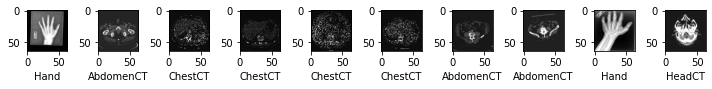

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tarfile as tarf
import os
from PIL import Image
import cv2

plt.subplots(1, 5, figsize=(10, 10))

for i,k in enumerate(np.random.randint(totalNum, size=10)):
    img = Image.open(imageFileList[k])
    arr = np.array(img)
    plt.subplot(1, 10, i + 1)
    plt.xlabel(classNames[imageLabelList[k]])
    plt.imshow(arr, cmap='gray')
plt.tight_layout()
plt.show()

In [7]:
testFracData = 0.20
trnX, trnY = [], []
testX, testY = [], []

for i in range(totalNum):
    ran = np.random.random()
    if ran < testFracData:
        testX.append(cv2.imread(imageFileList[i]))
        testY.append(imageLabelList[i])
    else:
        trnX.append(cv2.imread(imageFileList[i]))
        trnY.append(imageLabelList[i])

print("Training data =",len(trnX), "\n Testing data =",len(testX))

Training data = 40021 
 Testing data = 9979


In [8]:
trnX = np.array(trnX)
trnY = np.array(trnY)
testX  = np.array(testX)
testY  = np.array(testY)
print(type(trnX))

trnY = to_categorical(trnY, classCount)
testY = to_categorical(testY, classCount)
testY

<class 'numpy.ndarray'>


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [9]:

trnX = trnX.astype('float32') / 255
testX = testX.astype('float32') / 255
print("trainX shape:", trnX.shape, "trainY shape:", trnY.shape)
     

trainX shape: (40021, 64, 64, 3) trainY shape: (40021, 5)


In [10]:

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu', input_shape=(64,64,3))) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 64)                2097216   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                        

In [11]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [12]:
modelLog=model.fit(trnX, trnY,
          batch_size=70,
          epochs=10,
          verbose=1,
          validation_split=.15)

Epoch 1/10
486/486 [==============================] - 15s 10ms/step - loss: 0.4224 - accuracy: 0.8142 - val_loss: 0.0578 - val_accuracy: 0.9870
Epoch 2/10
486/486 [==============================] - 5s 9ms/step - loss: 0.1411 - accuracy: 0.9439 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 3/10
486/486 [==============================] - 4s 9ms/step - loss: 0.0966 - accuracy: 0.9634 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 4/10
486/486 [==============================] - 4s 9ms/step - loss: 0.0830 - accuracy: 0.9660 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 5/10
486/486 [==============================] - 5s 10ms/step - loss: 0.0765 - accuracy: 0.9696 - val_loss: 3.1685e-04 - val_accuracy: 1.0000
Epoch 6/10
486/486 [==============================] - 4s 9ms/step - loss: 0.0706 - accuracy: 0.9712 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 7/10
486/486 [==============================] - 4s 9ms/step - loss: 0.0609 - accuracy: 0.9759 - val_loss: 4.1168e-04 - val_accuracy: 1.

In [13]:
testPred = model.predict(testX)
testPredLabels = np.argmax(testPred, axis=1)
testTrueLabels = np.argmax(testY, axis=1)

# calculate confusion matrix
confusionMatrix = confusion_matrix(testTrueLabels, testPredLabels)

print(confusionMatrix)

312/312 [==============================] - 2s 4ms/step
[[2036    0    0    0    0]
 [   0 1918    0    3    0]
 [   0    0 1980    0    0]
 [   0    9    0 2021    0]
 [   0    0    0    0 2012]]


In [14]:
print(classification_report(testTrueLabels,testPredLabels, target_names=classNames,digits=5))


              precision    recall  f1-score   support

   AbdomenCT    1.00000   1.00000   1.00000      2036
         CXR    0.99533   0.99844   0.99688      1921
     ChestCT    1.00000   1.00000   1.00000      1980
        Hand    0.99852   0.99557   0.99704      2030
      HeadCT    1.00000   1.00000   1.00000      2012

    accuracy                        0.99880      9979
   macro avg    0.99877   0.99880   0.99878      9979
weighted avg    0.99880   0.99880   0.99880      9979

